## Анализ причин выжимаемости на Титанике

В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на [GitHub](https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/tree/master/data/titanic) курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data). 

Критерии оценивания:
* Четко сформулированы гипотезы и выводы из них
* Гипотез не меньше 3-х
* Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
* Использованы группировки `.groupby()` с агрегированием `.aggregate()`, трансформацией `.transform()` или фильтрацией  `.filter()` данных
* Присутствует визуализация
* Присутствует общий вывод исследования

## Шаблон исследования

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
data = pd.read_csv('train.csv') 

In [6]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


оценим выживаемость с целом

C:\Users\LocaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


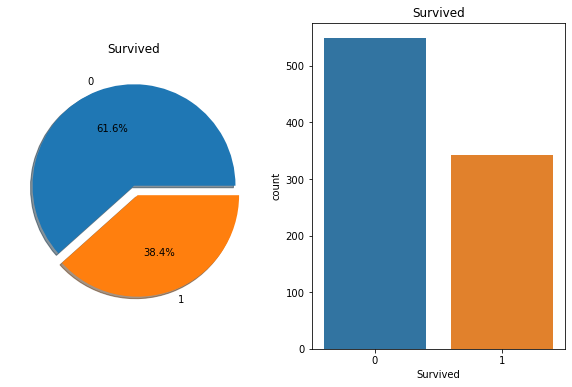

In [22]:
f,ax=plt.subplots(1,2,figsize=(10,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Из 891 пассажира, участвовавшего в тренировочном наборе, выжили только около 350, т. е. Только 38,4% от общего числа участников тренировочного набора пережили крушение

### Гипотеза 1

__Формулировка__: Чем выше социальный статус, тем больше вероятность спасения

In [27]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


C:\Users\LocaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


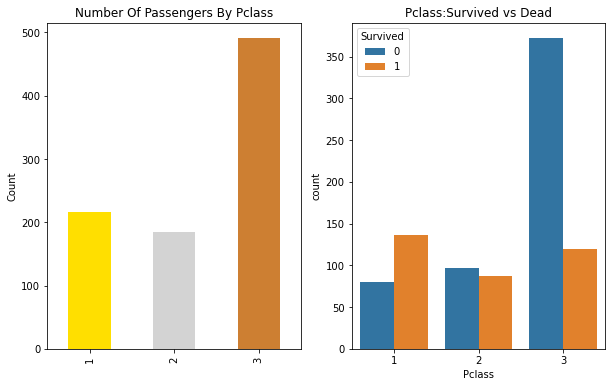

In [29]:
f,ax=plt.subplots(1,2,figsize=(10,6))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

__Вывод__: Пассажирам 1-го класса при спасении был отдан очень высокий приоритет. Несмотря на то, что количество пассажиров в классе 3 было намного больше, все равно число выживших из них очень низкое, где-то около 25%.

Для класса 1 процент выживших составляет около 63%, в то время как для класса 2-около 48%

###  Гипотеза 2

__Формулировка__: Людей с минимальным количеством родственников больше спаслось

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

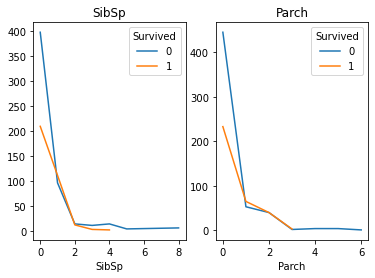

In [15]:
fig, axes = plt.subplots(ncols=2)
data.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

__Вывод__:из людей имеющих больше 1 родственников спаслись не многие

### Гипотеза 3
 
__Формулировка__: При спасении приоритет отдавался женщинам

In [23]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [30]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\LocaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


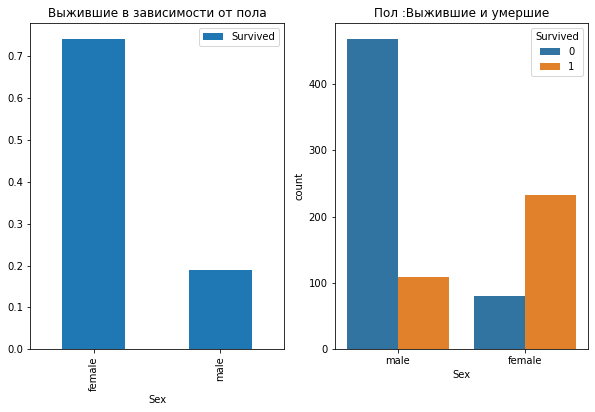

In [26]:
f,ax=plt.subplots(1,2,figsize=(10,6))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Выжившие в зависимости от пола')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Пол :Выжившие и умершие')
plt.show()

C:\Users\LocaL\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LocaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


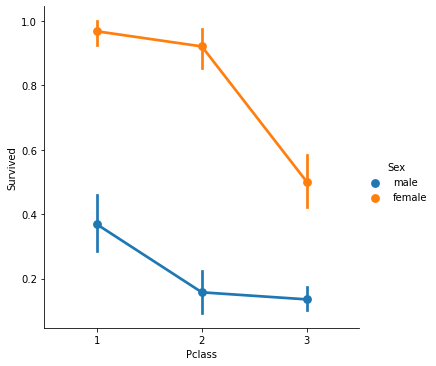

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

__Вывод__: Количество мужчин на корабле намного больше, чем количество женщин. Тем не менее число спасенных женщин почти вдвое превышает число спасенных мужчин. 
Глядя на перекрестную таблицу и график факторов, мы можем легко сделать вывод, что выживаемость женщин из Pclass1 составляет около 95-96%, так как только 3 из 94 женщин из Pclass1 умерли.

Очевидно, что независимо от класса, женщинам при спасении уделялось первостепенное внимание. Даже у мужчин из Pclass1 очень низкая выживаемость.
Выживаемость женщин на корабле составляет около 75%, в то время как у мужчин-около 18-19%

## Гипотеза 4

Формулировка:  Чем больше заплатит пассажир, тем выше будут его шансы на выживание.

In [47]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
data['Fare_Category'] = pd.cut(data['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

C:\Users\LocaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


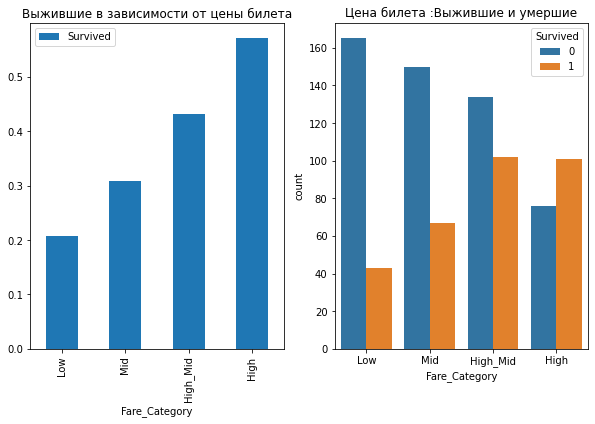

In [40]:
f,ax=plt.subplots(1,2,figsize=(10,6))
data[['Fare_Category','Survived']].groupby(['Fare_Category']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Выжившие в зависимости от цены билета')
sns.countplot('Fare_Category',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Цена билета :Выжившие и умершие')
plt.show()


In [46]:
data.groupby('Fare_Category')['Survived'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Fare_Category,,,,,,
Low,208,0,1,0.206731,0,0.405938
Mid,217,0,1,0.308756,0,0.463048
High_Mid,236,0,1,0.432203,0,0.496435
High,177,0,1,0.570621,1,0.496392


### Вывод исследования:

Пассажиры с более высоким доходом чаще выживали, при этом в приоритете были женщины. Пассажиры с семьей были обречены, т.к. наверняка пытались спасити родственников. В целом критерии возраст, класс, размер семьи, стоимость билетов играют важную роль в оценки выживаемости.
  